In [70]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline

In [71]:
df = pd.read_csv("criteria_choosing_eda.csv")

In [72]:
df

Image Name  Focus Score (Daugman)  Occluded Pixels  \
0     C297_S1_I6.tiff              -0.903691         0.431788   
1      C91_S2_I7.tiff              -0.711492        -0.394066   
2     C109_S2_I7.tiff              -0.771991        -0.719853   
3    C297_S1_I10.tiff               0.586432         0.121845   
4     C419_S1_I6.tiff              -0.489510         1.445291   
..                ...                    ...              ...   
970  C245_S2_I12.tiff              -0.963724         0.489221   
971  C143_S1_I14.tiff              -0.769664         2.688033   
972  C310_S2_I10.tiff              -0.816667        -0.666380   
973   C44_S1_I11.tiff               1.563249        -0.363864   
974   C232_S1_I2.tiff              -0.294984        -0.734706   

     Pixel Count Score  Sharpness  Motion Blur Metric  Off-Angle Metric  \
0            -0.868102  -0.768586           -1.124966         -0.595180   
1            -0.744816  -0.942157           -0.509566         -0.306869   
2            -0.451571  -0.519887           -0.453373         -0.051067   
3             0.153765   1.037072            0.792466         -0.008291   
4            -0.358225  -0.387766            1.243092         -0.528449   
..                 ...        ...                 ...               ...   
970           0.409320  -0.851486           -0.658166         -0.240138   
971           1.842964  -0.903298           -1.257814         -0.452308   
972           0.652370  -0.952520            0.162549         -0.115232   
973          -0.044726   1.858297            0.721630          0.213289   
974          -1.005126   0.619983           -1.743518         -0.563526   

     Usable Area  Gray Level Spread  Iris Size  Interlacing Score  \
0      -2.153423          -1.643934  -0.793636           0.789925   
1       0.177337          -0.879299  -0.328973          -0.249353   
2       0.752551          -0.496982  -0.467596          -0.419580   
3       0.213838          -0.798811   0.395745           0.503228   
4      -0.868866           1.153020   0.027564           0.539065   
..           ...                ...        ...                ...   
970    -0.148090          -0.134786   0.640829           0.077661   
971    -1.205287          -1.523202   1.498625          -1.790353   
972     0.821154          -0.114664   0.602015          -0.840667   
973     0.521234           0.086555   0.211654           1.040786   
974     0.164584           0.006068  -1.100823           0.718251   

     Quality Score  
0        -0.927657  
1        -0.927657  
2        -0.283604  
3         0.575134  
4        -0.283604  
..             ...  
970       1.004503  
971       0.789819  
972       1.648557  
973      -0.283604  
974       0.575134  

[975 rows x 12 columns]

In [73]:
df.describe()

Focus Score (Daugman)  Occluded Pixels  Pixel Count Score  \
count           9.750000e+02     9.750000e+02       9.750000e+02   
mean           -7.287618e-17    -3.279428e-17       6.376666e-17   
std             1.000513e+00     1.000513e+00       1.000513e+00   
min            -1.148012e+00    -1.063464e+00      -1.443673e+00   
25%            -7.717581e-01    -7.562439e-01      -7.868213e-01   
50%            -3.564129e-01    -3.673301e-01      -3.316306e-01   
75%             5.345431e-01     5.476448e-01       5.002878e-01   
max             3.176696e+00     7.158933e+00       5.178563e+00   

          Sharpness  Motion Blur Metric  Off-Angle Metric   Usable Area  \
count  9.750000e+02        9.750000e+02      9.750000e+02  9.750000e+02   
mean   1.785466e-16       -4.299695e-16     -7.287618e-18  1.694371e-16   
std    1.000513e+00        1.000513e+00      1.000513e+00  1.000513e+00   
min   -2.724500e+00       -4.806028e+00     -8.107721e-01 -3.084407e+00   
25%   -7.465660e-01       -6.015018e-01     -4.369084e-01 -5.588312e-01   
50%   -1.416575e-01        2.029592e-02     -2.255941e-01  3.967803e-01   
75%    6.536613e-01        7.034367e-01      1.679467e-01  7.817954e-01   
max    3.363444e+00        2.720233e+00      1.521917e+01  1.142623e+00   

       Gray Level Spread     Iris Size  Interlacing Score  Quality Score  
count       9.750000e+02  9.750000e+02       9.750000e+02   9.750000e+02  
mean        1.897513e-15 -1.657933e-16      -1.727165e-15   6.012285e-16  
std         1.000513e+00  1.000513e+00       1.000513e+00   1.000513e+00  
min        -4.139058e+00 -1.912042e+00      -7.170413e+00  -1.357026e+00  
25%        -6.177136e-01 -8.219147e-01      -5.987661e-01  -7.129728e-01  
50%        -1.405442e-02 -2.208479e-01       5.526280e-02  -2.836038e-01  
75%         6.499706e-01  6.020149e-01       6.779341e-01   5.751343e-01  
max         2.923753e+00  5.268046e+00       2.617623e+00   3.580718e+00

In [74]:
numeric_df_column = df.select_dtypes(include='float64')

In [75]:
def freedman_diaconis_bins(data, column):
    q25, q75 = np.percentile(data[column].dropna(), [25, 75])
    bin_width = 2 * (q75 - q25) * len(data[column].dropna()) ** (-1/3)
    if bin_width == 0 or np.isnan(bin_width):
        bins = 10
    else:
        bins = int((data[column].max() - data[column].min()) / bin_width)
    return bins

def plot_binned_bar_and_line(data, column, bins, ax, bar_color, line_color):
    binned_data = pd.cut(data[column], bins=bins)
    bin_counts = binned_data.value_counts().sort_index()
    bin_midpoints = [(interval.left + interval.right) / 2 for interval in bin_counts.index]
    ax.bar(bin_midpoints, bin_counts, width=(bin_midpoints[1] - bin_midpoints[0]), 
           color=bar_color, edgecolor='black', alpha=0.7, label='Bar Chart')
    ax.plot(bin_midpoints, bin_counts, marker='o', color=line_color, label='Line Chart')
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    ax.legend(loc='upper right')
    ax.grid(axis='y', linestyle='--', alpha=0.7)


def draw_distribution_plot(dataframe, dataframe_columns):
    fig, axes = plt.subplots(4, 3, figsize=(15, 20))

    for i, column in enumerate(dataframe_columns.columns):
        row, col = divmod(i, 3)
        bins = freedman_diaconis_bins(dataframe, column)
        plot_binned_bar_and_line(dataframe, column, bins, ax=axes[row, col], bar_color='lightblue', line_color='darkblue')
        axes[row, col].set_title(f'Distribution of {column}', fontsize=12, weight = "bold")
        axes[row, col].set_xlabel(column, fontsize=10)
        axes[row, col].set_ylabel('Frequency', fontsize=10)

    plt.tight_layout()
    plt.show()

In [76]:
def draw_scatter_plot(dataframe_columns, target_column):
    features = [col for col in dataframe_columns if col != target_column]

    sns.set(style="whitegrid")

    fig, axes = plt.subplots(4, 3, figsize=(15, 20))

    for i, feature in enumerate(features):
        row, col = divmod(i, 3)  
        sns.scatterplot(
            x=df[feature], 
            y=df[target_column], 
            ax=axes[row, col], 
            s=60,             
            edgecolor='black'
        )
        axes[row, col].set_title(f"{target_column} vs {feature}", fontsize=12, weight='bold') 
        axes[row, col].set_xlabel(feature, fontsize=10)  
        axes[row, col].set_ylabel(target_column, fontsize=10) 
        axes[row, col].grid(True) 
        axes[row, col].tick_params(axis='both', labelsize=10)  

    plt.tight_layout()
    plt.show()

In [77]:
def draw_correlation_plot(dataframe_columns):
    correlation_matrix = dataframe_columns.corr()

    plt.figure(figsize=(12, 9))

    sns.heatmap(
        correlation_matrix, 
        annot=True, 
        fmt=".2f", 
        cmap="coolwarm_r",  
        vmin=-1, 
        vmax=1, 
        center=0, 
        square=True, 
        cbar=True, 
        linewidths=0.5,
        annot_kws={"size": 10}
    )

    plt.title("Correlation Matrix of Iris Qality Assessment", fontsize=16)
    plt.show()

In [78]:
def draw_pair_plot(dataframe, dataframe_columns, target_column):
    sns.pairplot(dataframe, vars=list(dataframe_columns.columns) + [target_column], diag_kind='kde')
    plt.show()

In [79]:
def draw_box_plot(dataframe, dataframe_columns, target_column):
    fig, axes = plt.subplots(4, 3, figsize=(15, 20))
    
    for i, feature in enumerate(dataframe_columns):
        row, col = divmod(i, 3)
        sns.boxplot(x=pd.qcut(dataframe[target_column], q=4, duplicates='drop'), y=dataframe[feature], ax=axes[row, col])
        axes[row, col].set_title(f'Boxplot: {feature} by Quality Score Quartiles', fontsize=12, weight='bold')
        axes[row, col].set_xlabel(f'Quality Score Quartiles for {target_column}', fontsize=10)
        axes[row, col].set_ylabel(feature, fontsize=10)
    
    plt.tight_layout()
    plt.show()

In [80]:
def draw_violin_plot(dataframe, dataframe_columns, target_column):
    fig, axes = plt.subplots(4, 3, figsize=(15, 20))
    
    for i, feature in enumerate(dataframe_columns):
        row, col = divmod(i, 3)
        sns.violinplot(x=pd.qcut(dataframe[target_column], q=4, duplicates='drop'), y=dataframe[feature], ax=axes[row, col])
        axes[row, col].set_title(f'Boxplot: {feature} by Quality Score Quartiles',fontsize=12, weight='bold')
        axes[row, col].set_xlabel(f'Quality Score Quartiles for {target_column}',fontsize=10)
        axes[row, col].set_ylabel(feature, fontsize=10)
    
    plt.tight_layout()
    plt.show()

In [81]:
def draw_feature_importance(dataframe, dataframe_columns, target_column):
    features = [col for col in dataframe_columns if col != target_column]
    importances_quality_score = RandomForestRegressor().fit(X=dataframe[features], y=dataframe[target_column]).feature_importances_

    fig, ax = plt.subplots(figsize=(10, 6))
    sns.barplot(x=features, y=importances_quality_score, ax=ax)
    ax.tick_params(axis='x', rotation=90, labelsize=8)
    ax.set_title(f'Feature Importance for {target_column}', fontsize=12)
    ax.set_xlabel('Features', fontsize=8)
    ax.set_ylabel('Importance', fontsize=8)
    
    plt.tight_layout()
    plt.show()

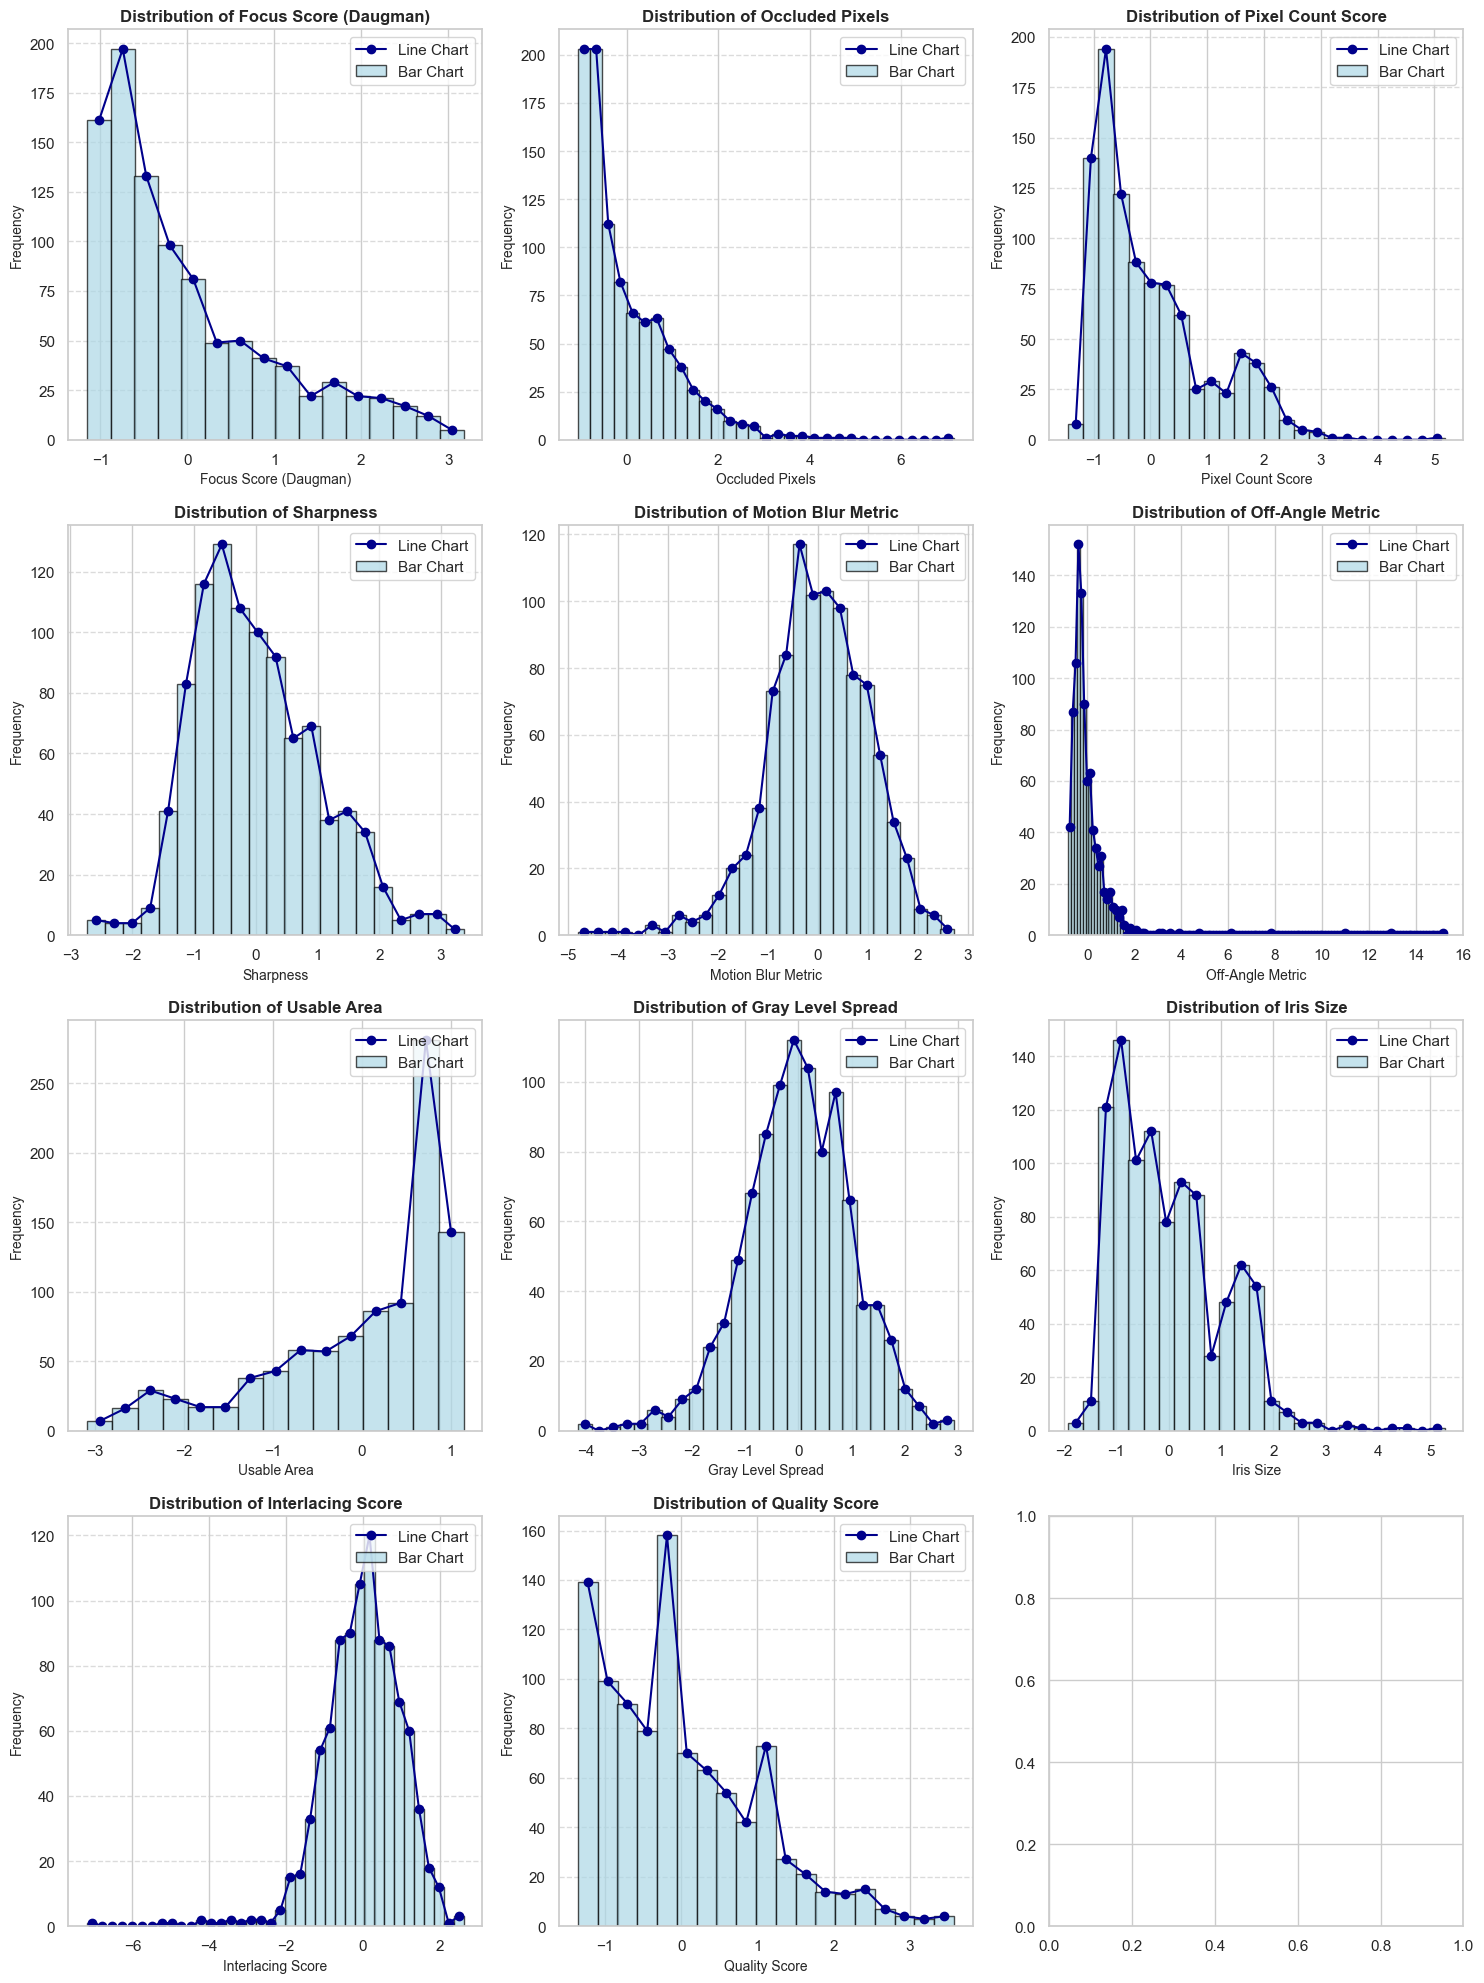

In [82]:
draw_distribution_plot(df, numeric_df_column)

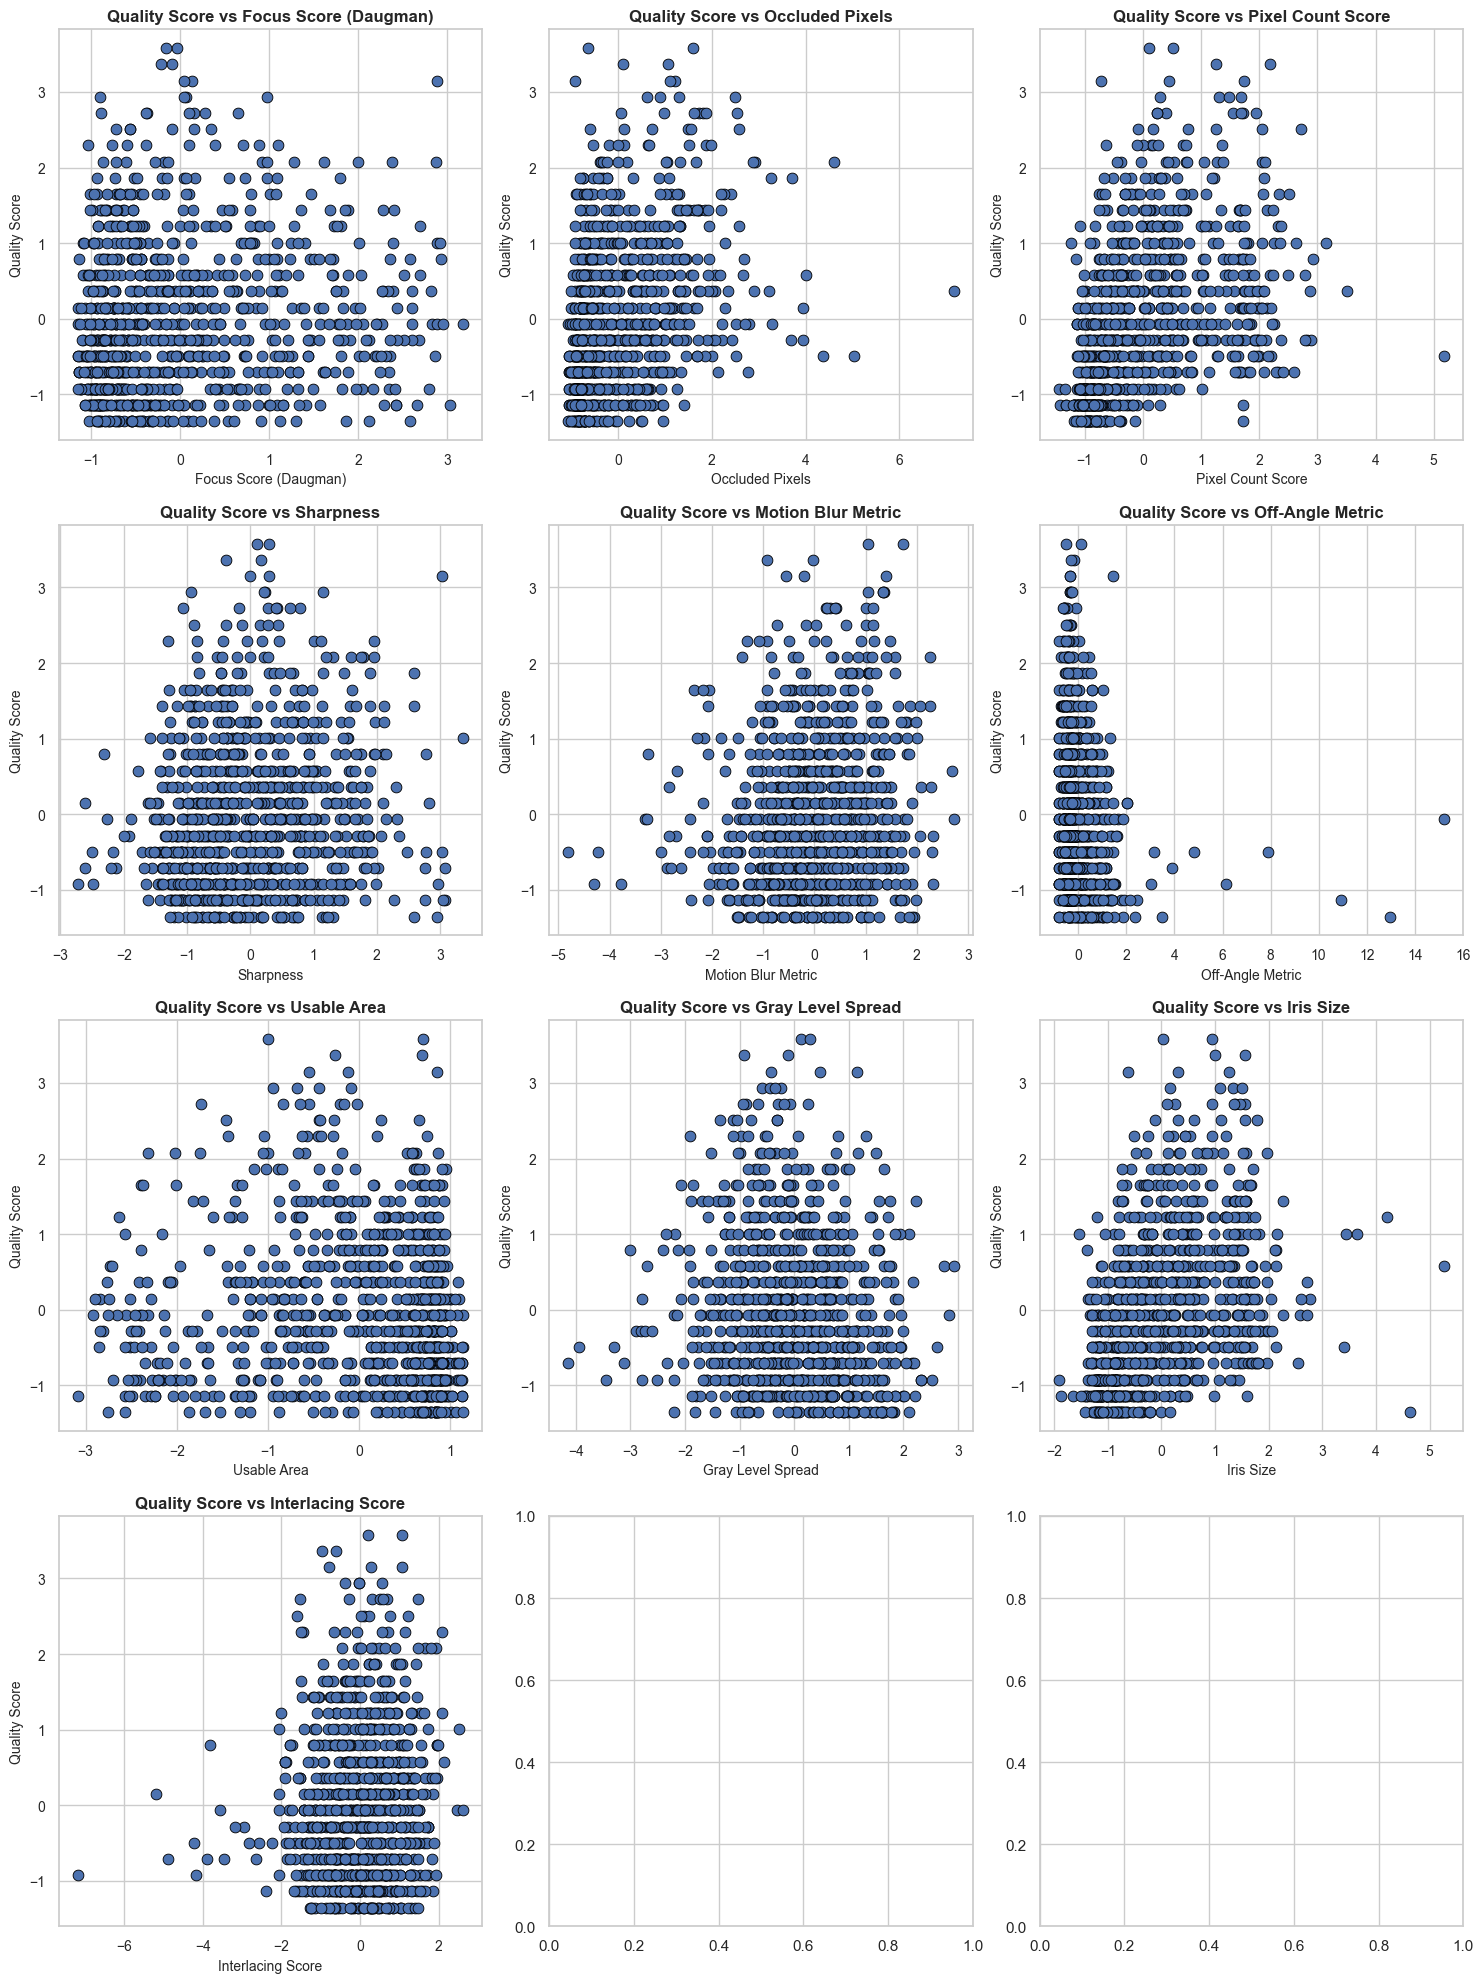

In [83]:
draw_scatter_plot(numeric_df_column, "Quality Score")

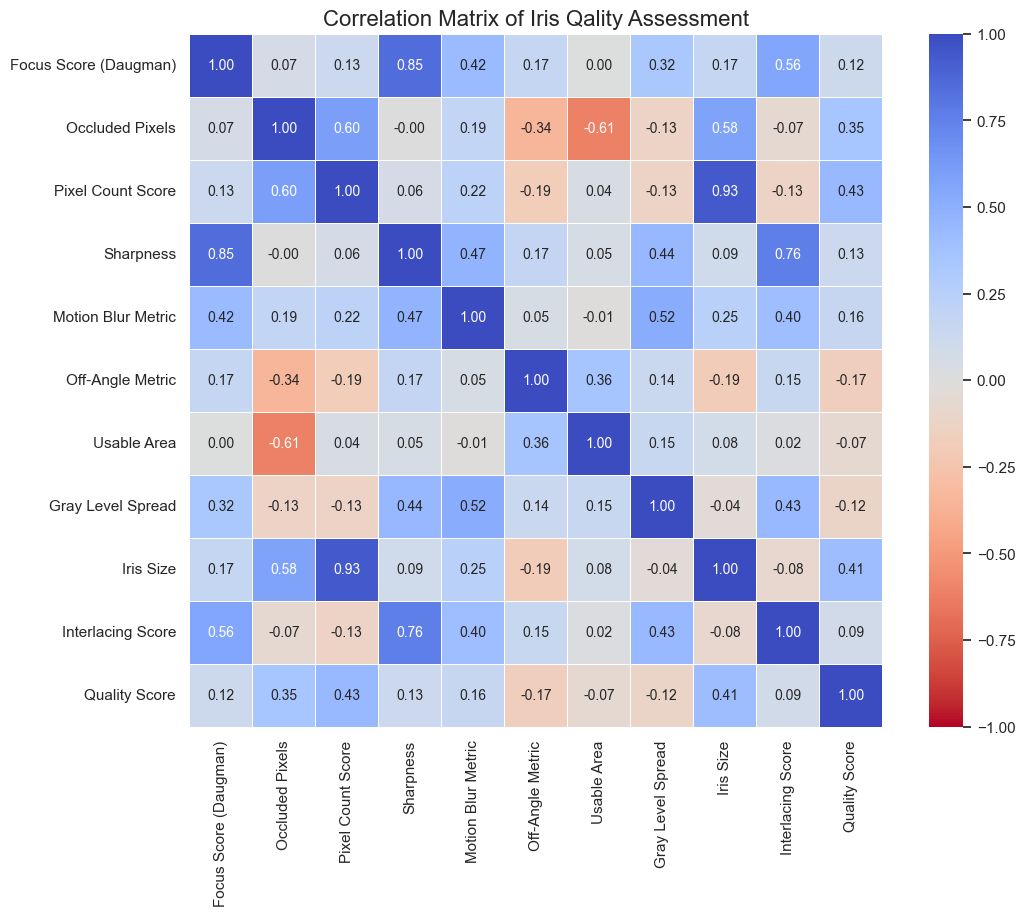

In [84]:
draw_correlation_plot(numeric_df_column)

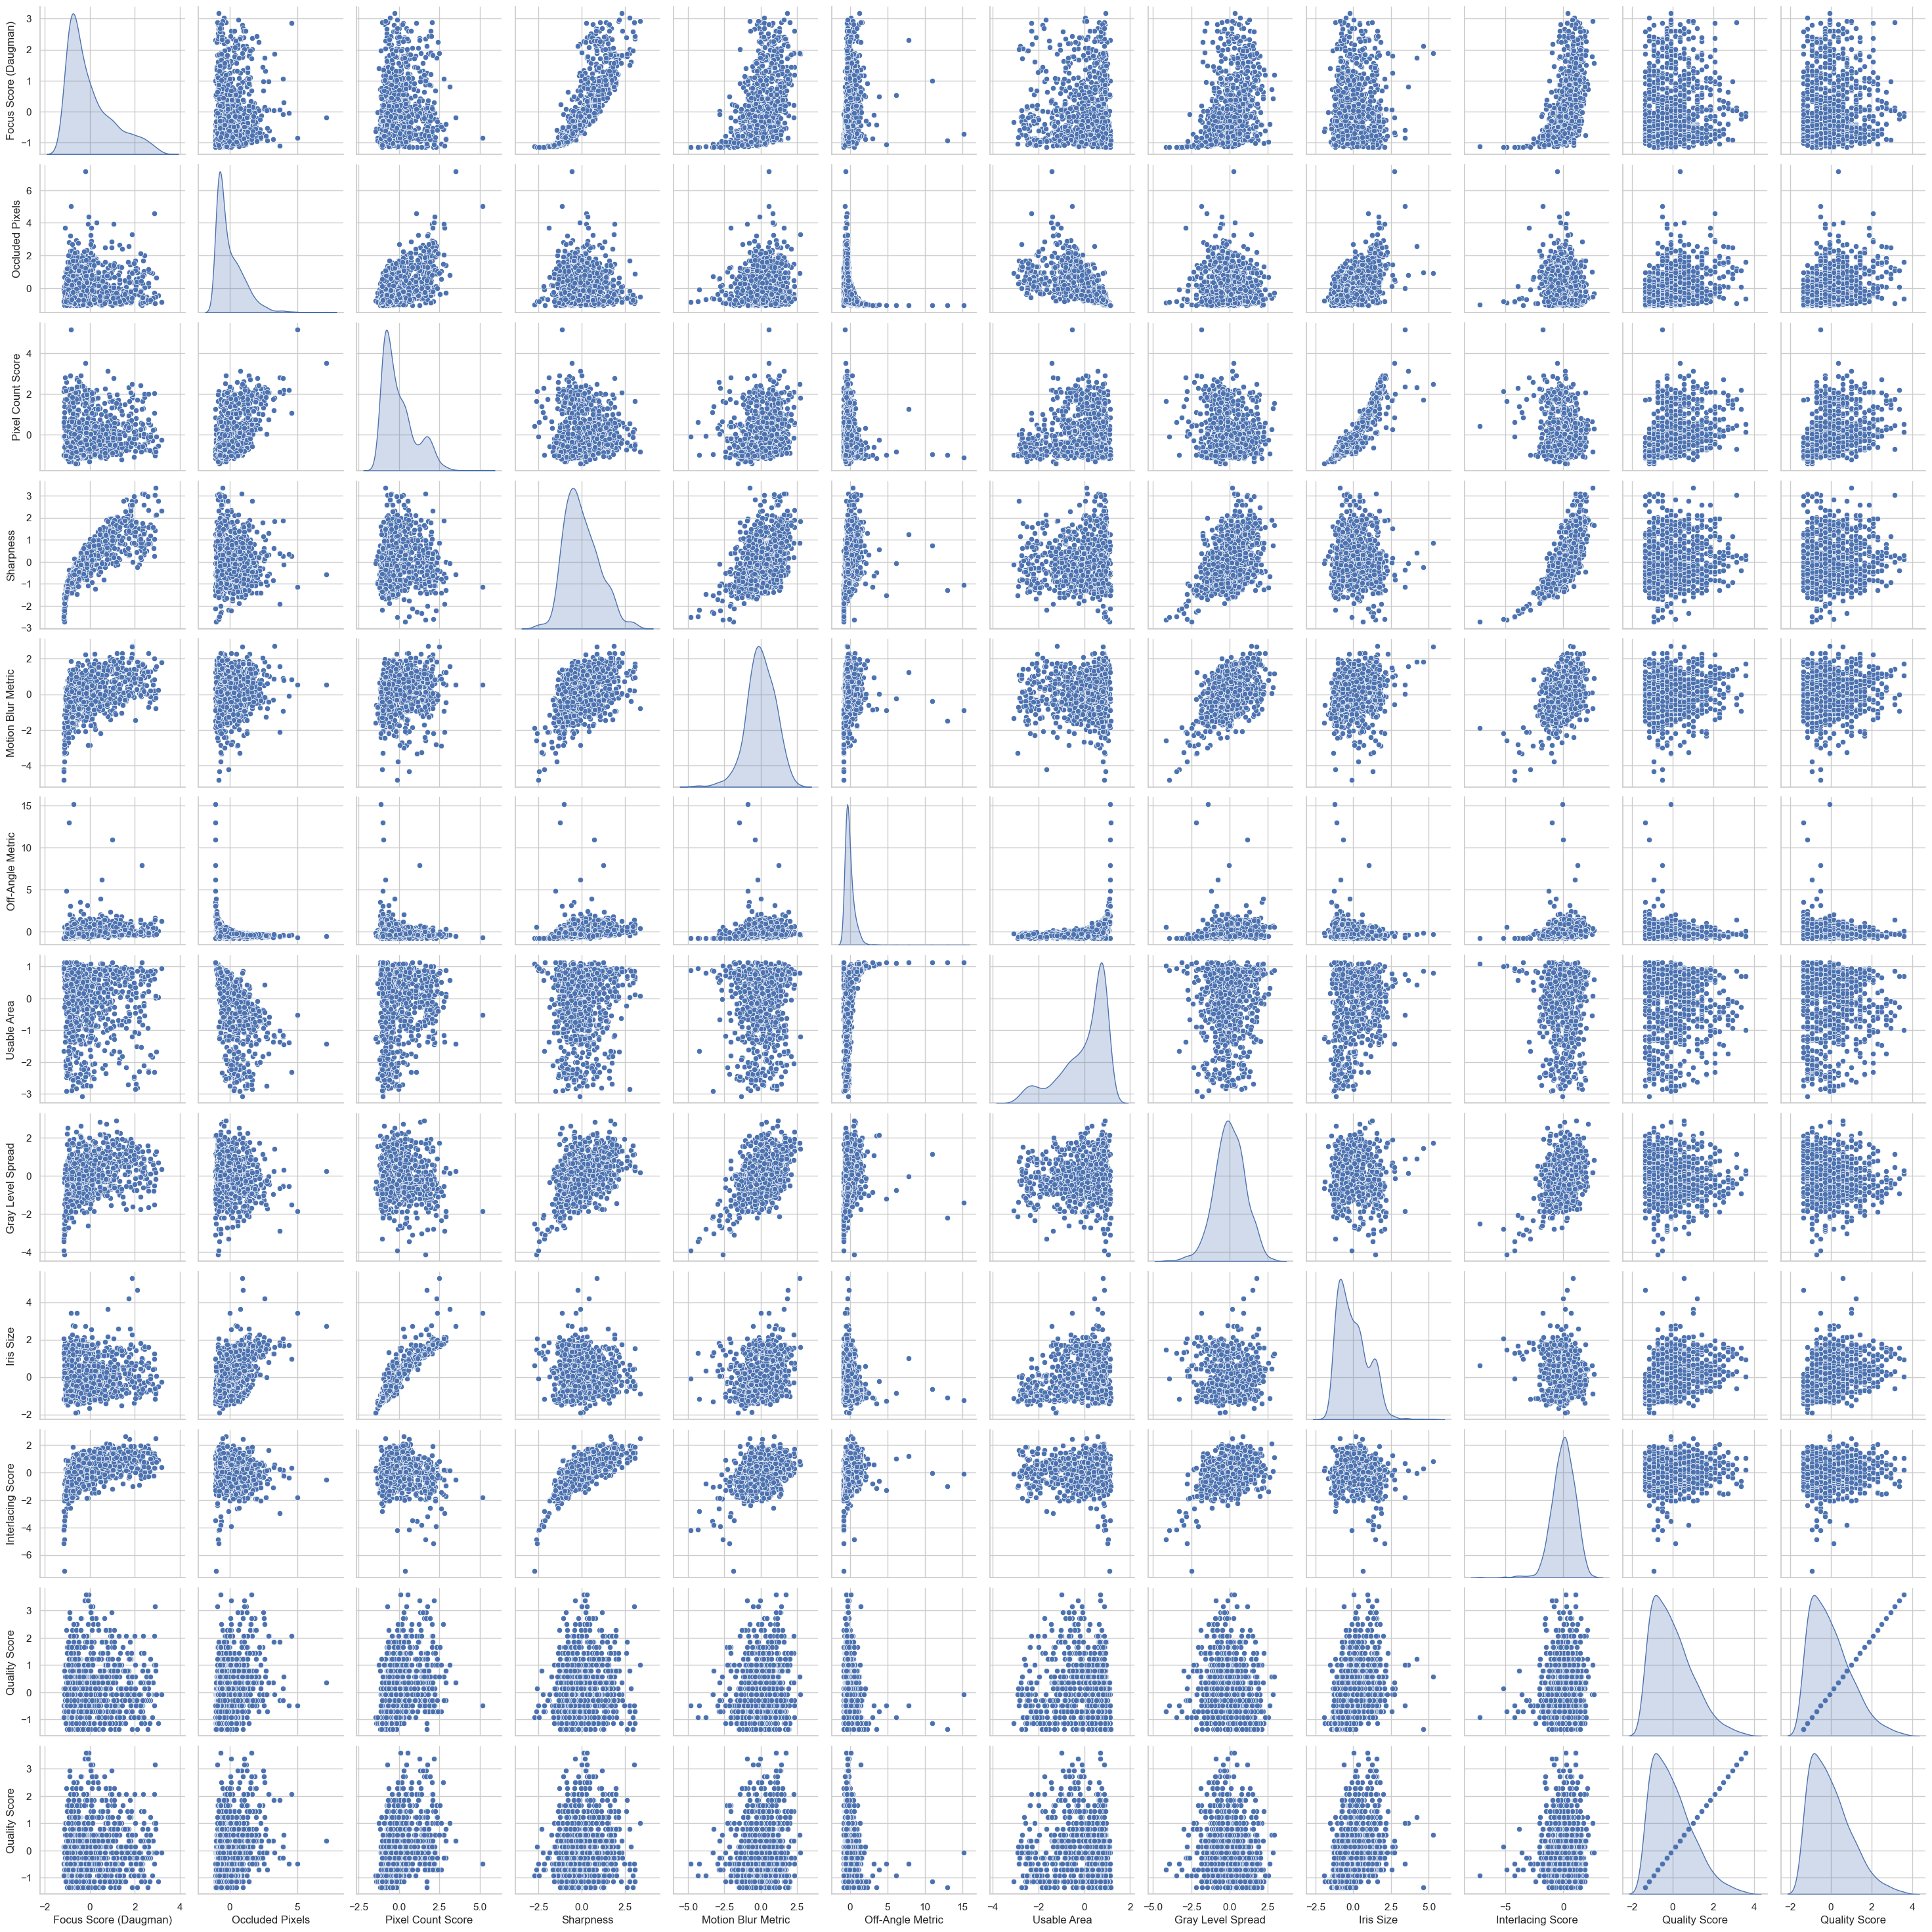

In [85]:
draw_pair_plot(df, numeric_df_column, "Quality Score")

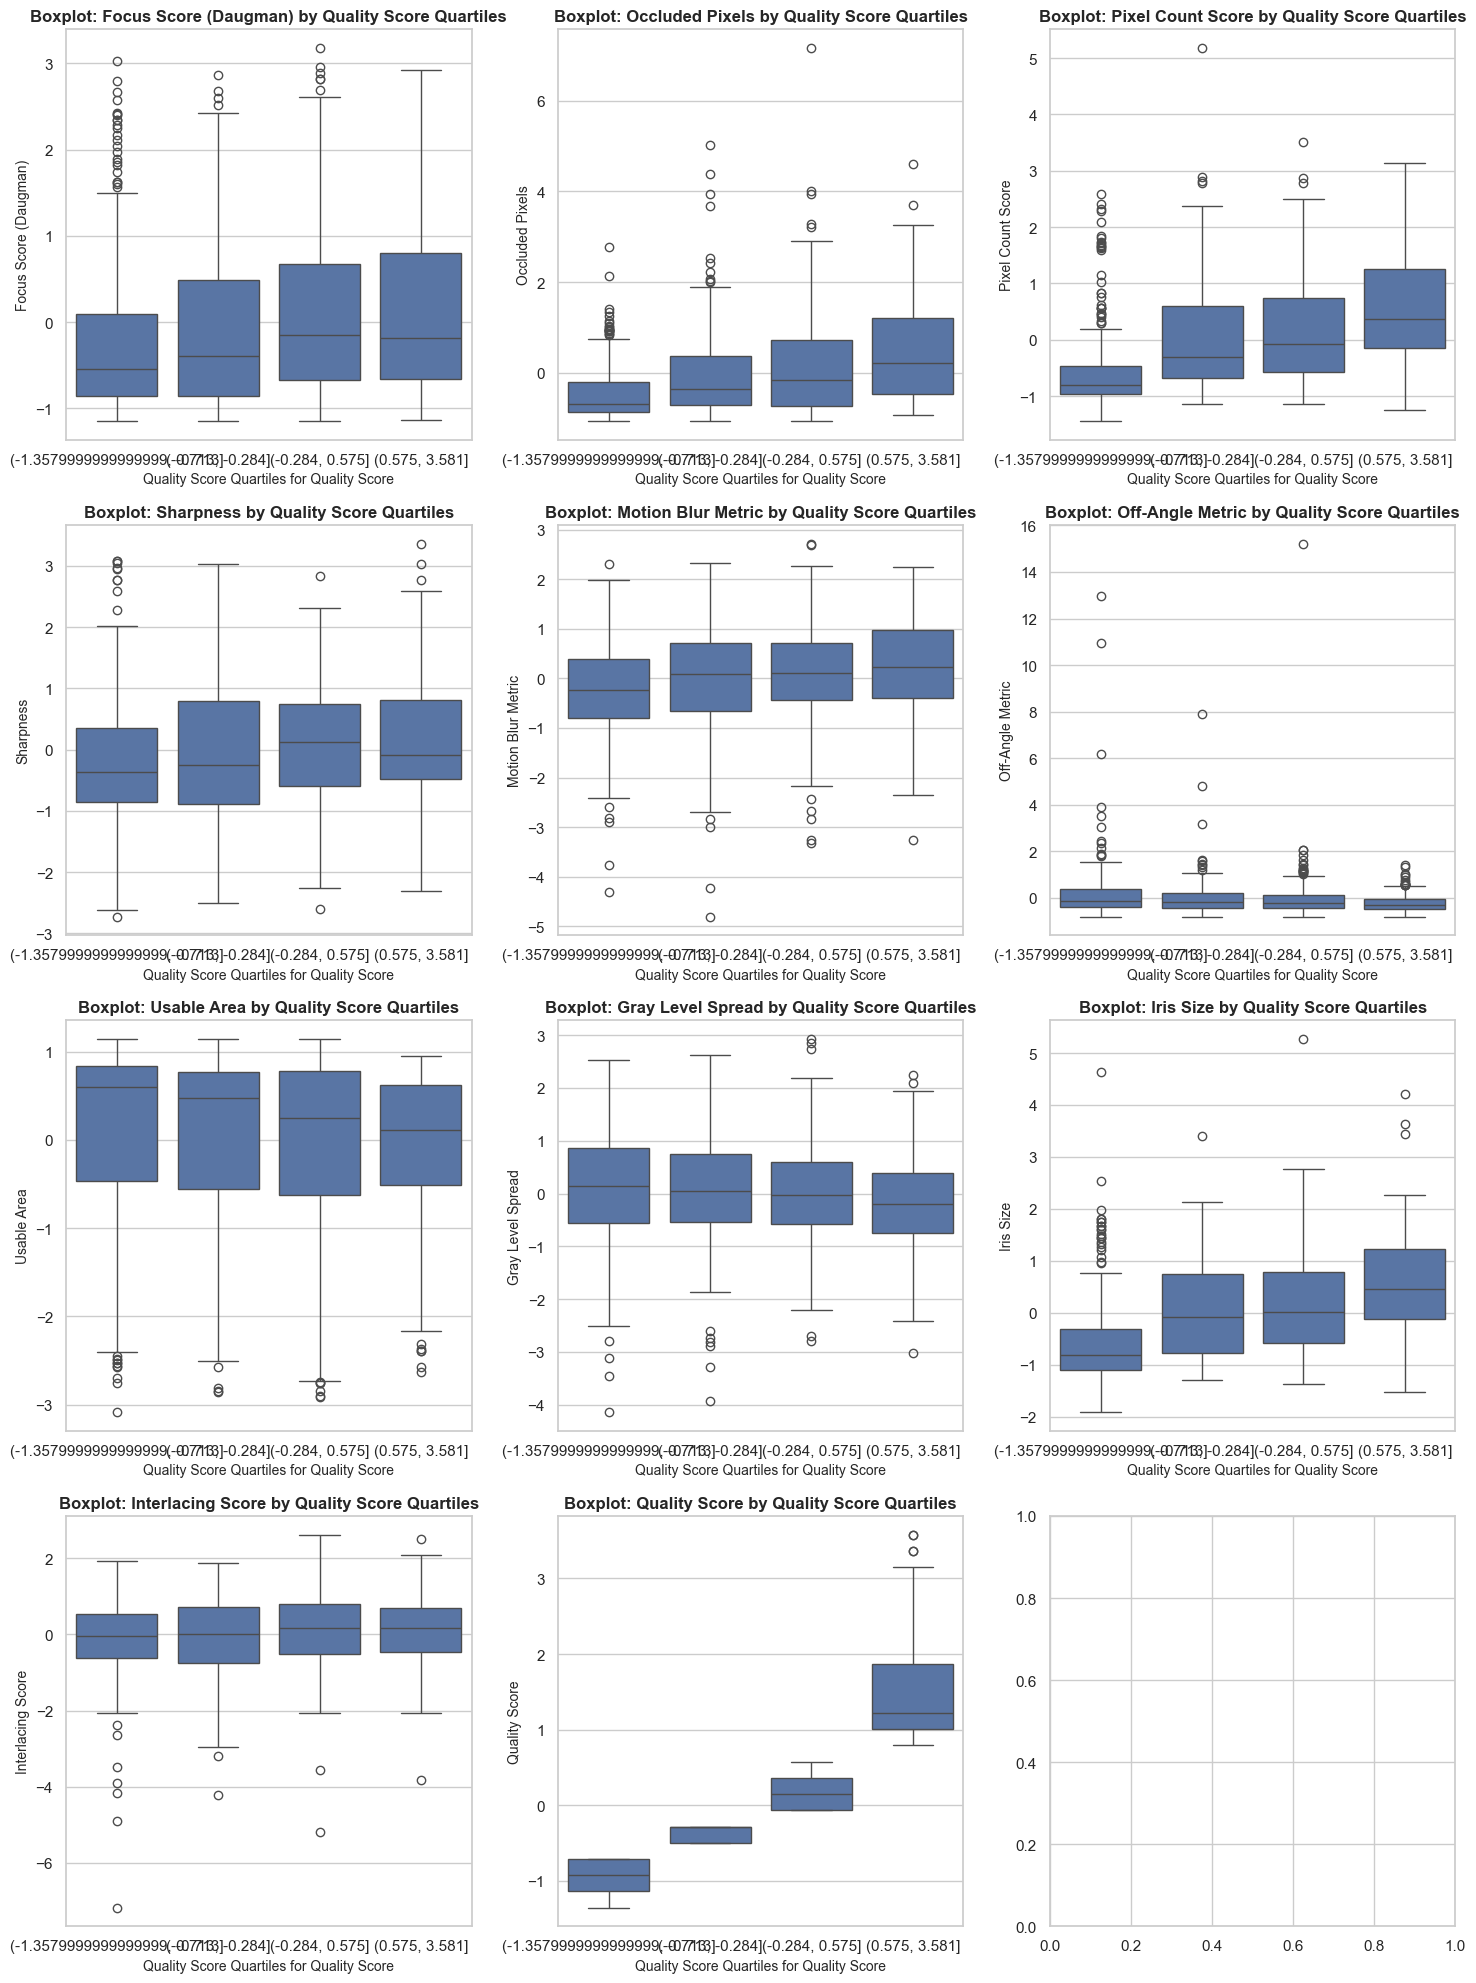

In [86]:
draw_box_plot(df, numeric_df_column, "Quality Score")

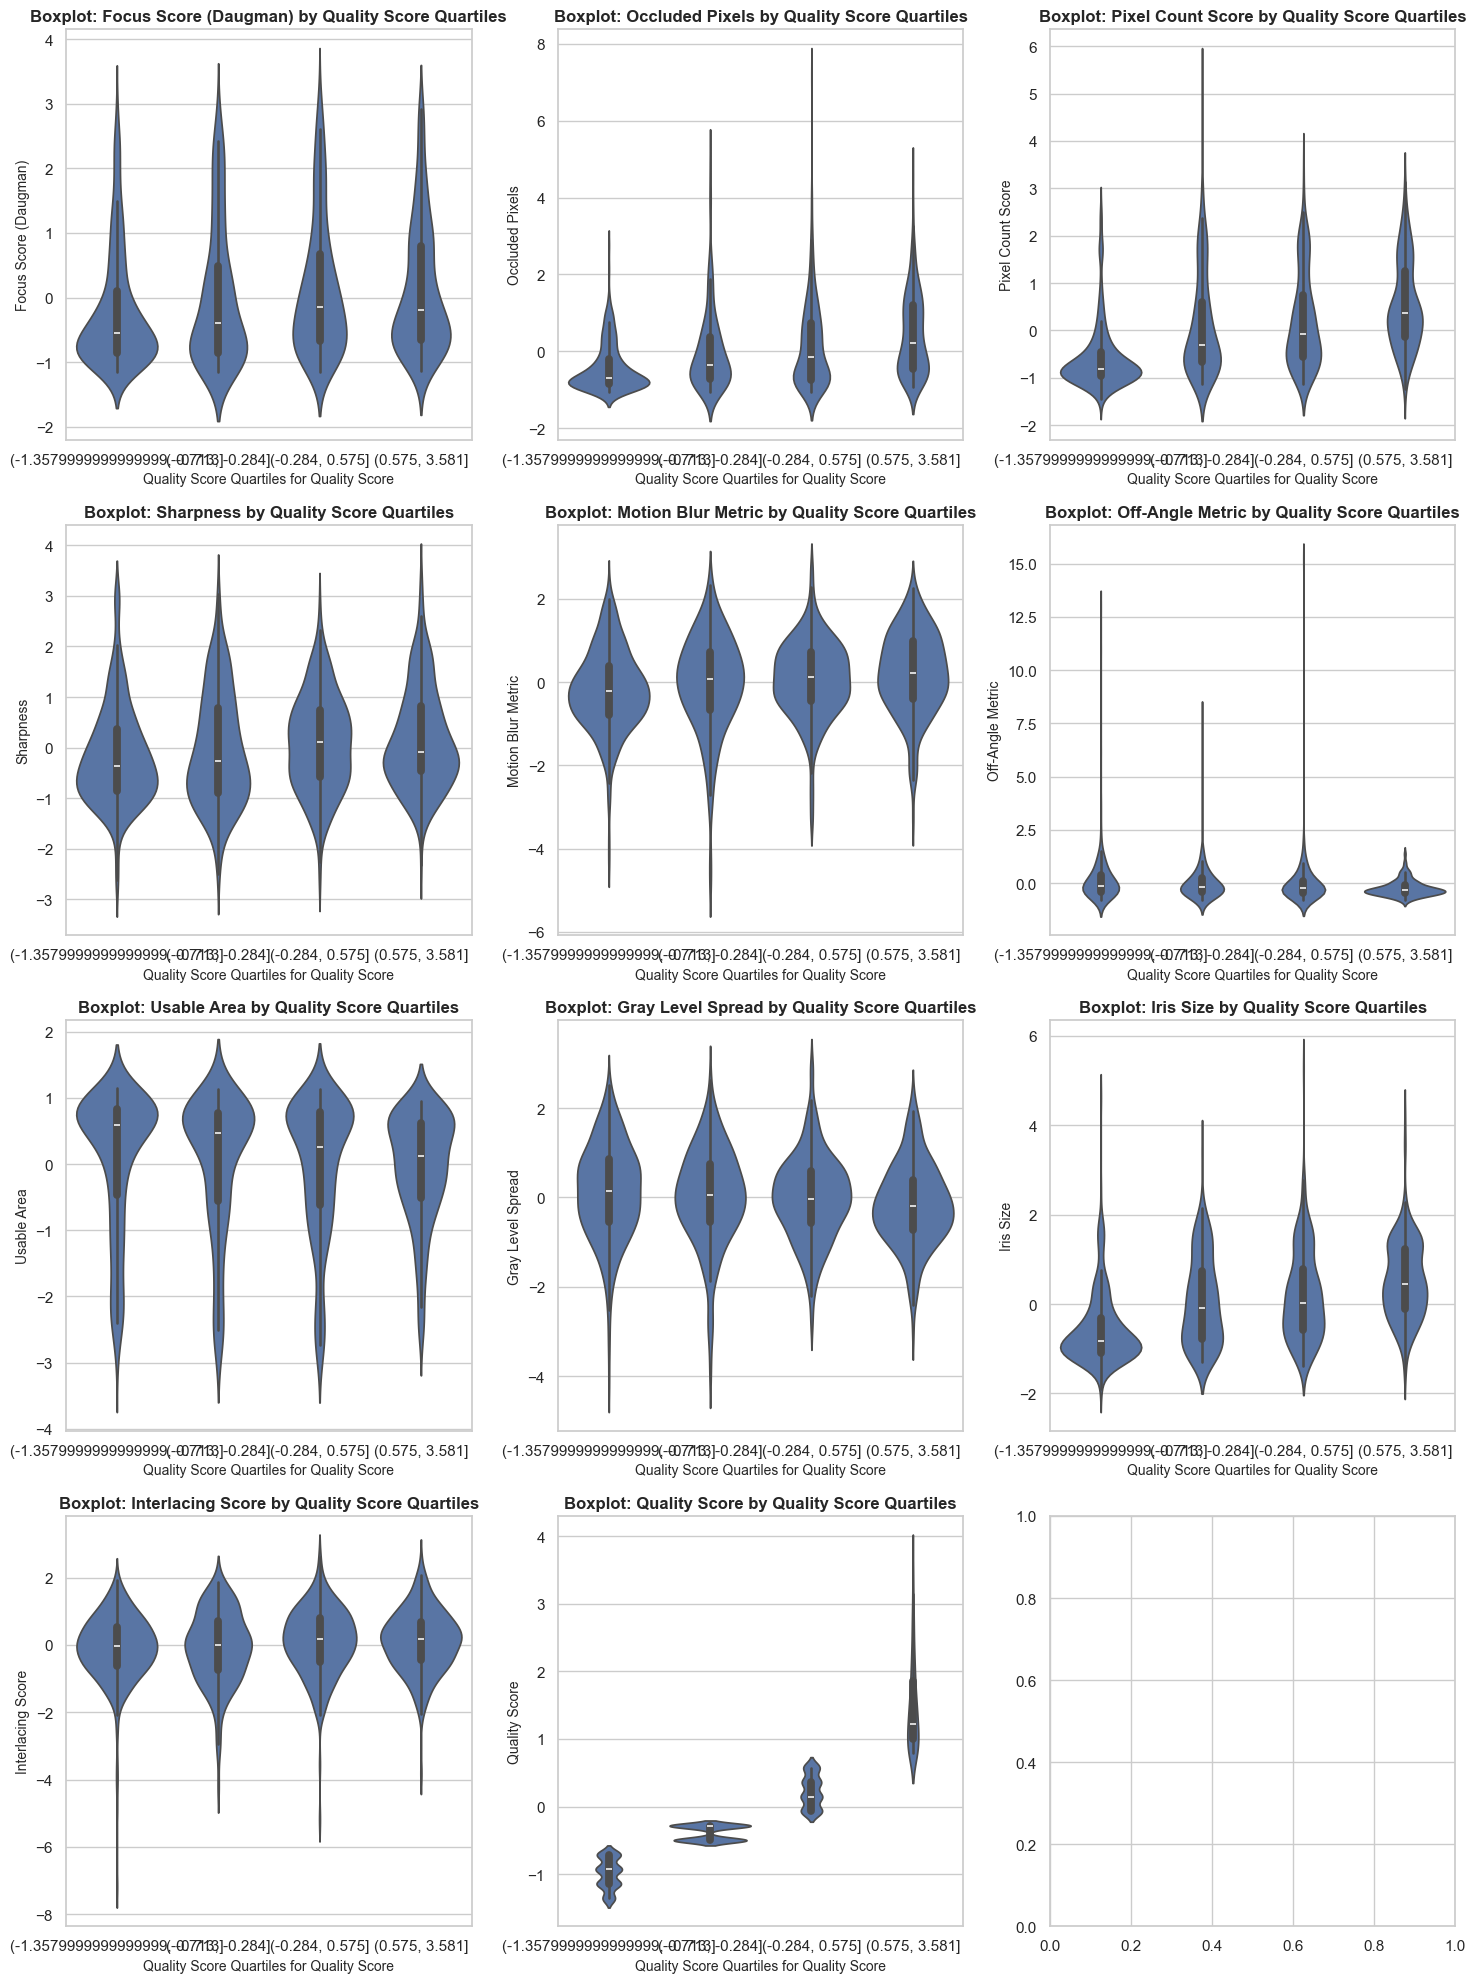

In [87]:
draw_violin_plot(df, numeric_df_column, "Quality Score")

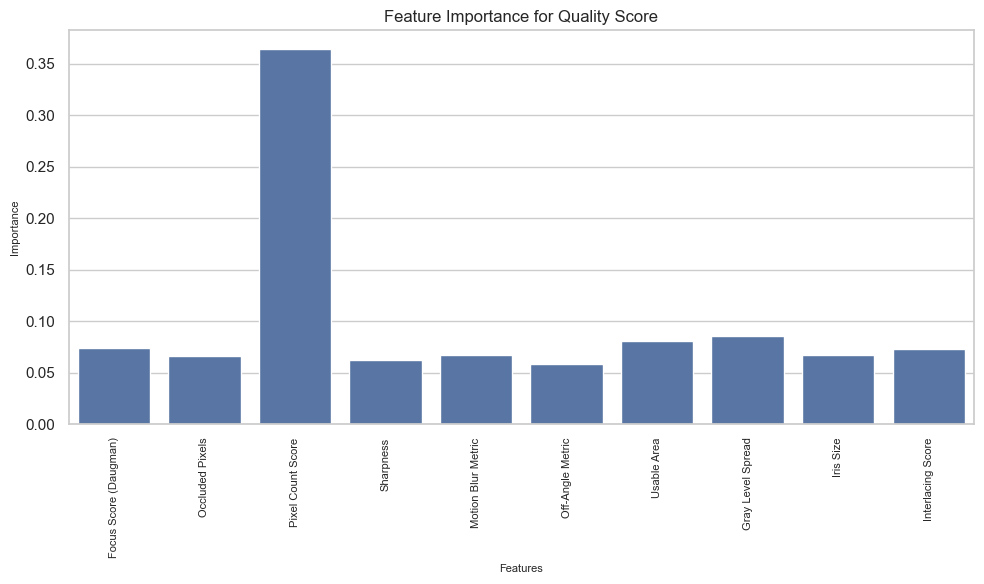

In [88]:
draw_feature_importance(df, numeric_df_column, "Quality Score")